In [1]:
import pandas as pd

data = pd.read_csv('files/weather.csv', parse_dates=True, index_col=0)
dataset = data[['Humidity3pm', 'Pressure3pm', 'RainTomorrow']]

<Axes: xlabel='Humidity3pm', ylabel='Pressure3pm'>

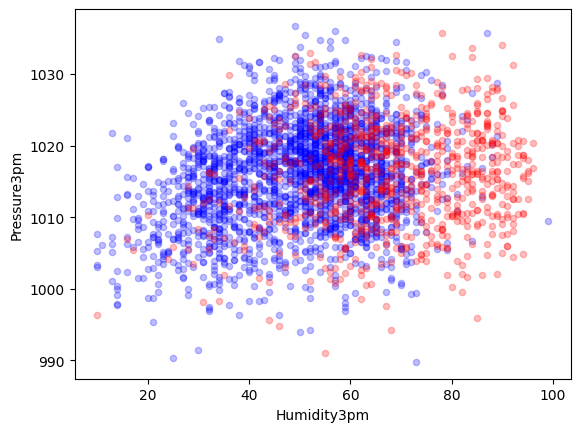

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots()
dataset[dataset['RainTomorrow'] == 'No'].plot.scatter(x='Humidity3pm', y='Pressure3pm', alpha=.25, c='blue', ax=ax)
dataset[dataset['RainTomorrow'] == 'Yes'].plot.scatter(x='Humidity3pm', y='Pressure3pm', alpha=.25, c='red', ax=ax)

In [21]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

dataset_clean = dataset.dropna()
X = dataset_clean[['Humidity3pm', 'Pressure3pm']]
Y = dataset_clean['RainTomorrow']
Y = np.array([0 if value == 'No' else 1 for value in Y])

Y

array([1, 1, 1, ..., 0, 0, 0])